In [1]:
import cv2
import keras.optimizers
from tensorflow import *
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import Accuracy, Precision, Recall, F1Score
from keras import callbacks, layers, metrics, models, optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.utils as image
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.regularizers import L1, L2
import seaborn as sns
from sklearn.utils.fixes import sklearn
from sklearn.metrics import confusion_matrix

In [2]:
train_path = "MacacosDataset/training"
val_path = "MacacosDataset/validation"
test_path = "MacacosDataset/test"

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255.
)

test_datagen = ImageDataGenerator(
    rescale = 1./255.
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode = "categorical",
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode = "categorical",
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
     test_path,
     target_size = (224, 224),
     batch_size = batch_size,
     class_mode = "categorical"
)

train_num = train_generator.samples
val_num = validation_generator.samples

for image, label in train_generator:
    print(image.shape)
    print(label.shape)
    break

Found 1098 images belonging to 10 classes.
Found 252 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
(32, 224, 224, 3)
(32, 10)


In [3]:
model_ = Sequential([
    Conv2D(16, (3, 3), activation = "relu", input_shape = (224, 224, 3)),
    MaxPooling2D((2, 2)),

    BatchNormalization(),
    Conv2D(32, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),

    BatchNormalization(),
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),

    BatchNormalization(),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),

    BatchNormalization(),
    Conv2D(256, (3, 3), activation = "relu", kernel_regularizer = L2(0.01)),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])

model_.summary()

model_.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                        

In [6]:
epochs = 100
filepath = ("Weights/convweights.h5")

callbacks_list = [
    EarlyStopping(
        monitor = "val_accuracy",
        patience = 25
    ),
    ModelCheckpoint(
        filepath,
        monitor = "val_accuracy",
        verbose = 1,
        save_best_only = True,
        mode = 'max'
    )
]

history = model_.fit(
    train_generator,
    steps_per_epoch = train_num // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = val_num // batch_size,
    callbacks = callbacks_list
)

Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 2.8424 - accuracy: 0.3921
Epoch 1: val_accuracy improved from -inf to 0.12946, saving model to Weights\convweights.h5
34/34 [==============================] - 40s 1s/step - loss: 2.8424 - accuracy: 0.3921 - val_loss: 4.1484 - val_accuracy: 0.1295
Epoch 2/100
34/34 [==============================] - ETA: 0s - loss: 2.5068 - accuracy: 0.4456
Epoch 2: val_accuracy improved from 0.12946 to 0.21875, saving model to Weights\convweights.h5
34/34 [==============================] - 39s 1s/step - loss: 2.5068 - accuracy: 0.4456 - val_loss: 3.8874 - val_accuracy: 0.2188
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 2.4268 - accuracy: 0.4109
Epoch 3: val_accuracy did not improve from 0.21875
34/34 [==============================] - 40s 1s/step - loss: 2.4268 - accuracy: 0.4109 - val_loss: 5.0633 - val_accuracy: 0.1384
Epoch 4/100
34/34 [==============================] - ETA: 0s - loss: 2.2325 - accuracy: 0.

<Figure size 640x480 with 0 Axes>

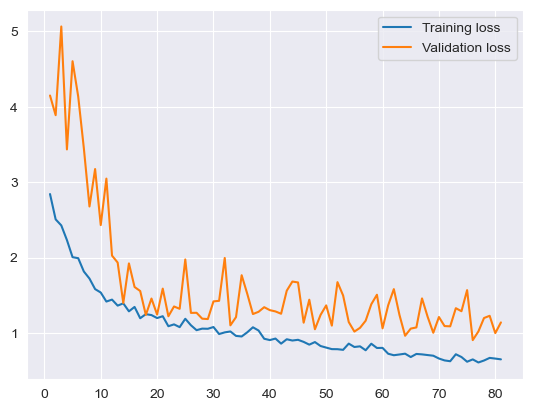

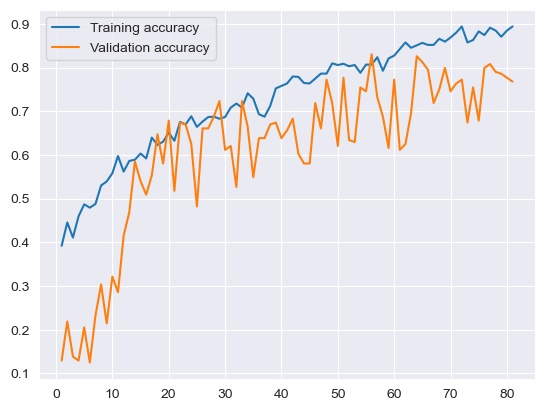

<Figure size 640x480 with 0 Axes>

In [7]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_loss, label = "Validation loss")
plt.legend()
plt.figure()

plt.plot(epochs, acc, label = "Training accuracy")
plt.plot(epochs, val_acc, label = "Validation accuracy")
plt.legend()
plt.figure()



In [8]:
from keras.models import load_model

1/1 [==============================] - 1s 1s/step


<Axes: >

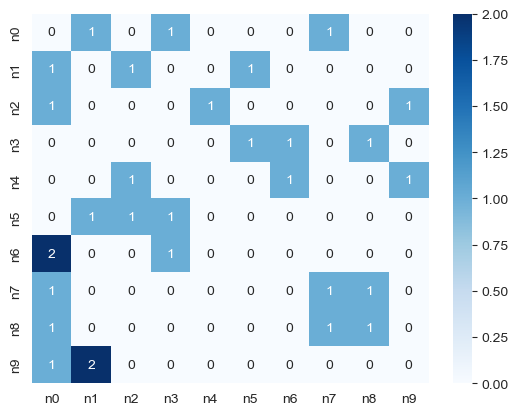

In [10]:
threshold = 0.5
#model_ = load_model(filepath)
y_pred = (model_.predict(test_generator)>= threshold).astype(int)

y_pred = y_pred.argmax(axis=1)
y_real = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9])

confusion_matrix = confusion_matrix(y_real, y_pred)
labels =["n0", "n1", "n2", "n3", "n4", "n5", "n6", "n7", "n8", "n9"]
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, )


In [ ]:
print(y_real.shape)
print(y_pred.shape)
